In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#loading the dataset
df = pd.read_csv("superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [67]:
#data preprocessing & preparation

#converting 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

#setet 'Order Date' as index
df.set_index('Order Date', inplace=True)

#time series analysis by month on sales and profit
time_series_data = df.resample('ME').sum()[['Sales', 'Profit']]

In [68]:
region_summary = df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Discount=('Discount', 'mean')
).reset_index()
region_summary

,Region,Total_Sales,Total_Profit,Avg_Discount
0,Central,501239.8908,39706.3625,0.240353
1,East,678781.2400,91522.7800,0.145365
2,South,391721.9050,46749.4303,0.147253
3,West,725457.8245,108418.4489,0.109335


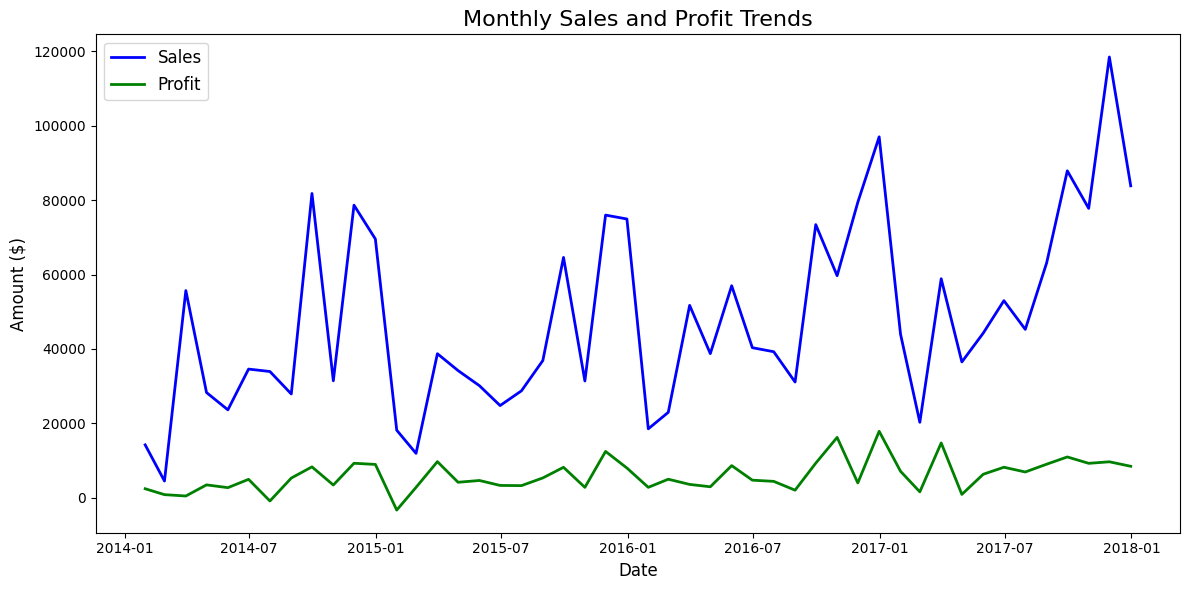

In [69]:
#Monthly Sales and Profit Trends
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Sales'], label='Sales', color='blue', linewidth=2)
plt.plot(time_series_data['Profit'], label='Profit', color='green', linewidth=2)
plt.title('Monthly Sales and Profit Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

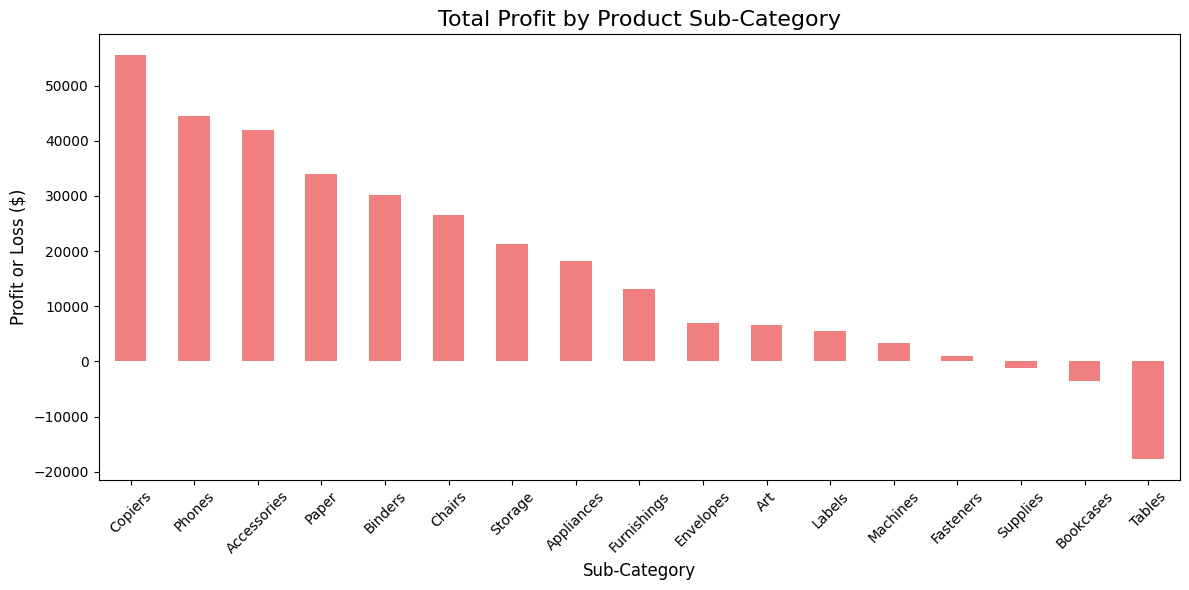

In [70]:
#Profit by Sub-Category (Bar Plot)
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
subcategory_profit.plot(kind='bar', color='lightcoral')
plt.title('Total Profit by Product Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Profit or Loss ($)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

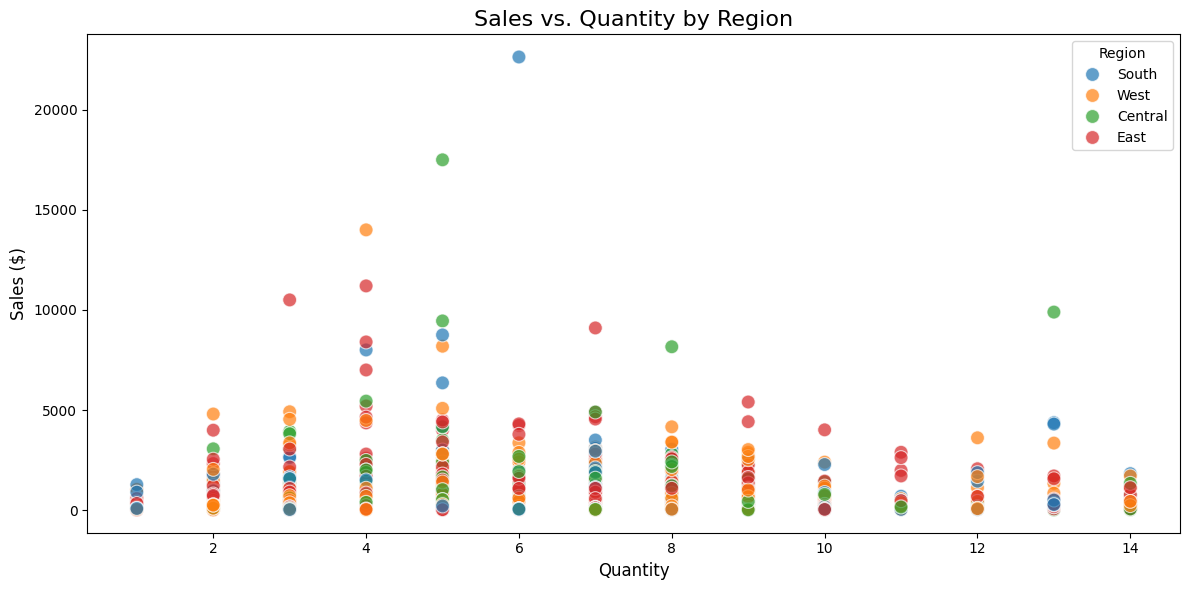

In [71]:
#Sales vs. Quantity by Region (Scatter Plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Quantity', y='Sales', hue='Region', alpha=0.7, s=100)
plt.title('Sales vs. Quantity by Region', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.legend(title='Region', fontsize=10)
plt.tight_layout()
plt.show()